# Mel Jensen

## Research question/interests

My main research question is 'Is there a link between the different age groups and their personality traits?' I am interested in this as I want to see if there is a link between the age of people and what their traits are. This could show if there is any link between how someone was raised, I.E., what parenting style was used at that time, and how they now behave. This could show if there is any truth behind statements people try to make about this, like "When I was a kid...".

I am going to average the collected data between each personality trait and compare it to the ages of the participants.

## EDA

In [73]:
# Import needed libraries
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Read file
file = ('../data/raw/data.csv')
df = pd.read_csv(file, sep='\t')

In [75]:
df.shape

(19719, 57)

In [76]:
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [77]:
df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

In [78]:
df.nunique(axis=0)

race        14
age        104
engnat       3
gender       4
hand         4
source       5
country    158
E1           6
E2           6
E3           6
E4           6
E5           6
E6           6
E7           6
E8           6
E9           6
E10          6
N1           6
N2           6
N3           6
N4           6
N5           6
N6           6
N7           6
N8           6
N9           6
N10          6
A1           6
A2           6
A3           6
A4           6
A5           6
A6           6
A7           6
A8           6
A9           6
A10          6
C1           6
C2           6
C3           6
C4           6
C5           6
C6           6
C7           6
C8           6
C9           6
C10          6
O1           6
O2           6
O3           6
O4           6
O5           6
O6           6
O7           6
O8           6
O9           6
O10          6
dtype: int64

In [79]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,...,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,5.324205,50767.027892,1.365130,1.616918,1.130128,1.952280,2.628937,2.759724,3.416755,3.152036,...,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,4.019064,7121271.921824,0.488796,0.499122,0.413663,1.504770,1.232565,1.313818,1.236820,1.222822,...,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,22.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,31.000000,2.000000,2.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,999999999.000000,2.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


From these quick analyses' it can be seen that most of the rows have 0 as the minimum value. These values are unanswered questions, and they should be removed for proper analysis.
I also noticed that the age column has an alarmingly high max and mean and in order to use this column for my analysis I will need to remove numbers higher than a normal human lifespan.
The rest of the numbers are what I would expect knowing the given data.

## I need to remove rows that have a 0 as 0 indicates missed values

In [80]:
dfnoZero = df.loc[(df!=0).all(axis=1)]
dfnoZero.index=range(19384)
dfnoZero

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19379,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19380,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19381,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19382,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


## Delete ages that are over 100 (less likely to be a proper data entry)

In [81]:
# I noticed that some of the ages were incorrect values (ex. 999999999, and values that looked like birth years)
# So, I took out this data
usableData = dfnoZero[dfnoZero.age <= 100]
usableData.index=range(19305)
usableData

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19301,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19302,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19303,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


In [82]:
usableData.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,...,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000,19305.000000
mean,5.353484,26.227558,1.370008,1.617871,1.135664,1.951671,2.628956,2.760373,3.417871,3.154157,...,3.696866,2.146542,4.127843,2.076353,3.874281,1.793939,4.076198,3.210567,4.135354,4.006423
std,4.001358,11.522396,0.482819,0.495945,0.405853,1.504688,1.232150,1.313236,1.235065,1.222230,...,1.114044,1.133551,1.006776,1.108389,0.939693,1.067750,0.920507,1.257449,0.980997,0.983104
min,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,22.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,9.000000,31.000000,2.000000,2.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,100.000000,2.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The new mins, maxs and average now look like proper data, so this is the data I will be using moving forward

## Defining which columns go with which trait
### E = Extroversion
### N = Neuroticism
### A = Agreeableness
### C = Conscientiousness
### O = Openness to Experience

## Which columns are positive vs negative attributes
A1 -  &nbsp; &nbsp;E1 +  &nbsp; &nbsp;C1 +<br/>
A2 +  &nbsp; &nbsp;E2 -  &nbsp; &nbsp;C2 -<br/>
A3 -  &nbsp; &nbsp;E3 +  &nbsp; &nbsp;C3 +<br/>
A4 +  &nbsp; &nbsp;E4 -  &nbsp; &nbsp;C4 -<br/>
A5 -  &nbsp; &nbsp;E5 +  &nbsp; &nbsp;C5 +<br/>
A6 +  &nbsp; &nbsp;E6 -  &nbsp; &nbsp;C6 -<br/>
A7 -  &nbsp; &nbsp;E7 +  &nbsp; &nbsp;C7 +<br/>
A8 +  &nbsp; &nbsp;E8 -  &nbsp; &nbsp;C8 -<br/>
A9 +  &nbsp; &nbsp;E9 +  &nbsp; &nbsp;C9 +<br/>
A10 +  &nbsp; &nbsp;E10 -  &nbsp; &nbsp;C10 +<br/>
O1 +  &nbsp; &nbsp;N1 -  &nbsp; &nbsp;<br/>
O2 -  &nbsp; &nbsp;N2 +  &nbsp; &nbsp;<br/>
O3 +  &nbsp; &nbsp;N3 -  &nbsp; &nbsp;<br/>
O4 -  &nbsp; &nbsp;N4 +  &nbsp; &nbsp;<br/>
O5 +  &nbsp; &nbsp;N5 -  &nbsp; &nbsp;<br/>
O6 -  &nbsp; &nbsp;N6 -  &nbsp; &nbsp;<br/>
O7 +  &nbsp; &nbsp;N7 -  &nbsp; &nbsp;<br/>
O8 +  &nbsp; &nbsp;N8 -  &nbsp; &nbsp;<br/>
O9 +  &nbsp; &nbsp;N9 -  &nbsp; &nbsp;<br/>
O10 +  &nbsp; &nbsp;N10 -  &nbsp; &nbsp;<br/>

In [83]:
## From these I need to pull the values convert them to negative values if needed

# Scores that need to be negative: A1, A3, A5, A7, O2, O4, O6, E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, C2, C4, C6, C8

def negative(df, cols):
    df2 = -df[cols]
    df3 = df.drop(df[cols], axis=1)
    newFrame = [df3, df2]
    df4 = pd.concat(newFrame, axis=1)
    return df4

revers = negative(usableData, cols=['A1', 'A3', 'A5', 'A7', 'O2', 'O4', 'O6',  'E2', 'E4', 'E6', 'E8', 'E10', 'N1', 'N3', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'C2', 'C4', 'C6', 'C8'])
revers

,race,age,engnat,gender,hand,source,country,E1,E3,E5,...,N5,N6,N7,N8,N9,N10,C2,C4,C6,C8
0,3,53,1,1,1,1,US,4,5,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,13,46,1,2,1,1,US,2,3,3,...,-3,-4,-3,-2,-2,-4,-1,-2,-1,-1
2,1,14,2,2,1,1,PK,5,1,5,...,-5,-5,-5,-5,-5,-5,-1,-1,-1,-1
3,3,19,2,2,1,1,RO,2,2,3,...,-4,-5,-5,-5,-4,-5,-3,-5,-4,-4
4,11,25,2,2,1,2,US,3,3,3,...,-3,-3,-3,-3,-3,-4,-1,-3,-1,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300,11,15,1,2,1,2,SG,1,3,4,...,-4,-5,-4,-4,-4,-4,-2,-3,-3,-3
19301,3,37,1,2,1,2,US,2,2,2,...,-3,-2,-2,-2,-2,-2,-3,-2,-4,-2
19302,5,16,2,1,1,2,US,2,4,5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-4
19303,12,16,1,1,1,5,NG,1,2,2,...,-4,-4,-4,-4,-4,-4,-3,-2,-2,-1


In [84]:
revers.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E3', 'E5', 'E7', 'E9', 'N2', 'N4', 'A2', 'A4', 'A6', 'A8', 'A9', 'A10',
       'C1', 'C3', 'C5', 'C7', 'C9', 'C10', 'O1', 'O3', 'O5', 'O7', 'O8', 'O9',
       'O10', 'A1', 'A3', 'A5', 'A7', 'O2', 'O4', 'O6', 'E2', 'E4', 'E6', 'E8',
       'E10', 'N1', 'N3', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'C2', 'C4',
       'C6', 'C8'],
      dtype='object')

In [85]:
## sum the scores

def sumcol(df, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10):
    return df[col1]+df[col2]+df[col3]+df[col4]+df[col5]+df[col6]+df[col7]+df[col8]+df[col9]+df[col10]

sumA = sumcol(revers, 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10')
sumO = sumcol(revers, 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10')
sumE = sumcol(revers, 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10')
sumN = sumcol(revers, 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10')
sumC = sumcol(revers, 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10')

In [86]:
# Pull the age data from the non-zero dataframe
ageframe=(revers['age'])
ageframe

0        53
1        46
2        14
3        19
4        25
         ..
19300    15
19301    37
19302    16
19303    16
19304    35
Name: age, Length: 19305, dtype: int64

In [87]:
## Dataframe with total scores
agevpers=[sumA, sumO, sumE, sumN, sumC, ageframe]
agevpers = pd.concat(agevpers, axis=1)
agevpers = agevpers.rename(columns={0:'sumA', 1:'sumO', 2:'sumE', 3:'sumN', 4:'sumC'})
agevpers

,sumA,sumO,sumE,sumN,sumC,age
0,22,25,14,1,23,53
1,11,8,-8,-19,18,46
2,14,27,5,-34,25,14
3,13,23,-8,-31,2,19
4,20,16,4,-18,10,25
...,...,...,...,...,...,...
19300,18,17,-9,-29,12,15
19301,12,12,-5,-9,8,37
19302,2,19,-9,-38,-1,16
19303,14,24,-9,-28,19,16


In [88]:
#Sort the data to view it easier
sortedAge = agevpers.sort_values(by=['age'])
sortedAge.index=range(19305)
sortedAge

,sumA,sumO,sumE,sumN,sumC,age
0,8,9,6,-17,8,13
1,11,12,7,-30,10,13
2,-1,4,9,-14,5,13
3,13,14,-3,-14,16,13
4,16,-1,13,-25,-4,13
...,...,...,...,...,...,...
19300,15,8,7,-15,2,80
19301,10,20,0,-30,10,92
19302,6,12,0,-18,6,97
19303,21,31,7,-23,20,99


<AxesSubplot:xlabel='age', ylabel='sumC'>

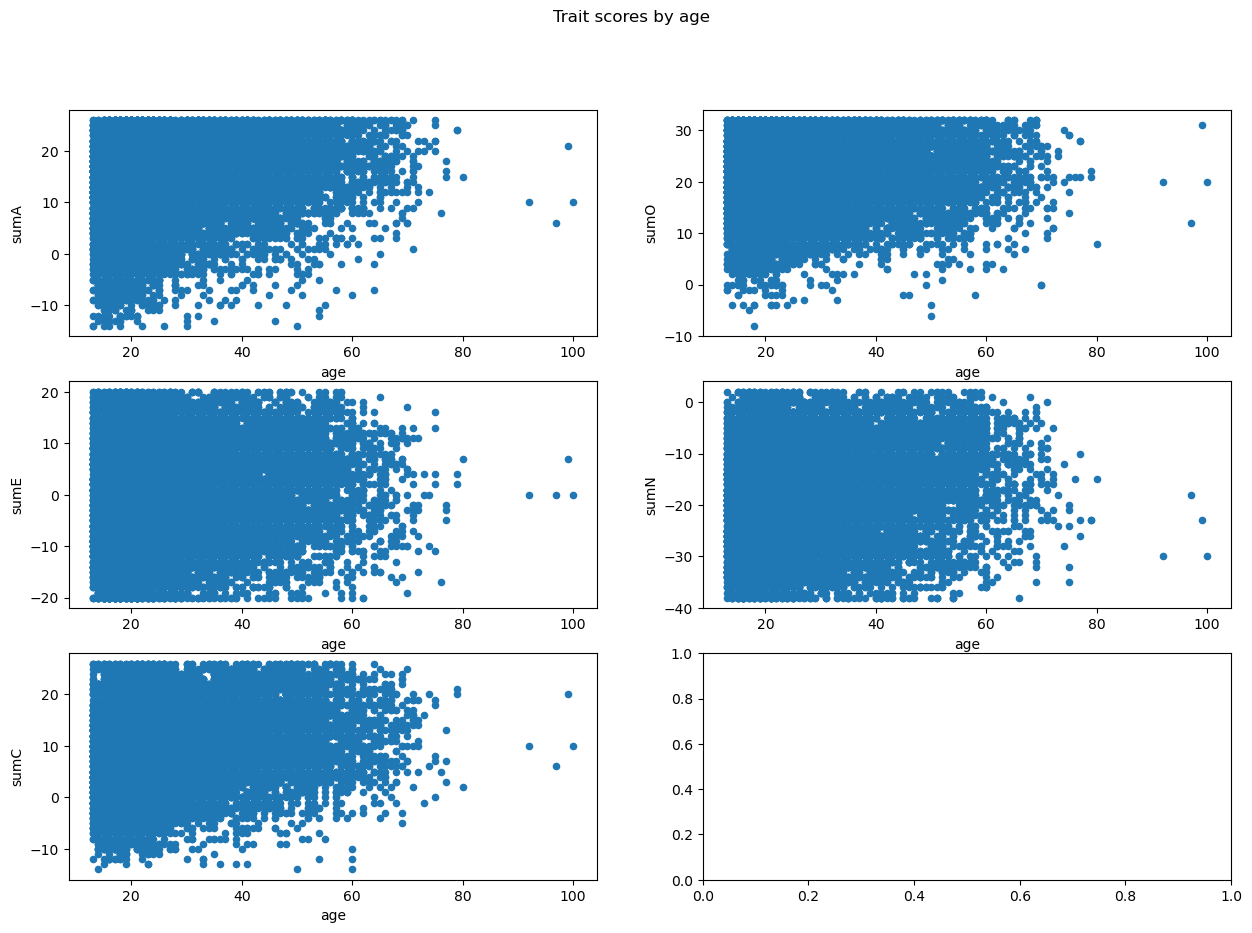

In [89]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Trait scores by age')
sortedAge.plot(ax=axes[0, 0], kind='scatter', x='age', y='sumA')
sortedAge.plot(ax=axes[0, 1], kind='scatter', x='age', y='sumO')
sortedAge.plot(ax=axes[1, 0], kind='scatter', x='age', y='sumE')
sortedAge.plot(ax=axes[1, 1], kind='scatter', x='age', y='sumN')
sortedAge.plot(ax=axes[2, 0], kind='scatter', x='age', y='sumC')

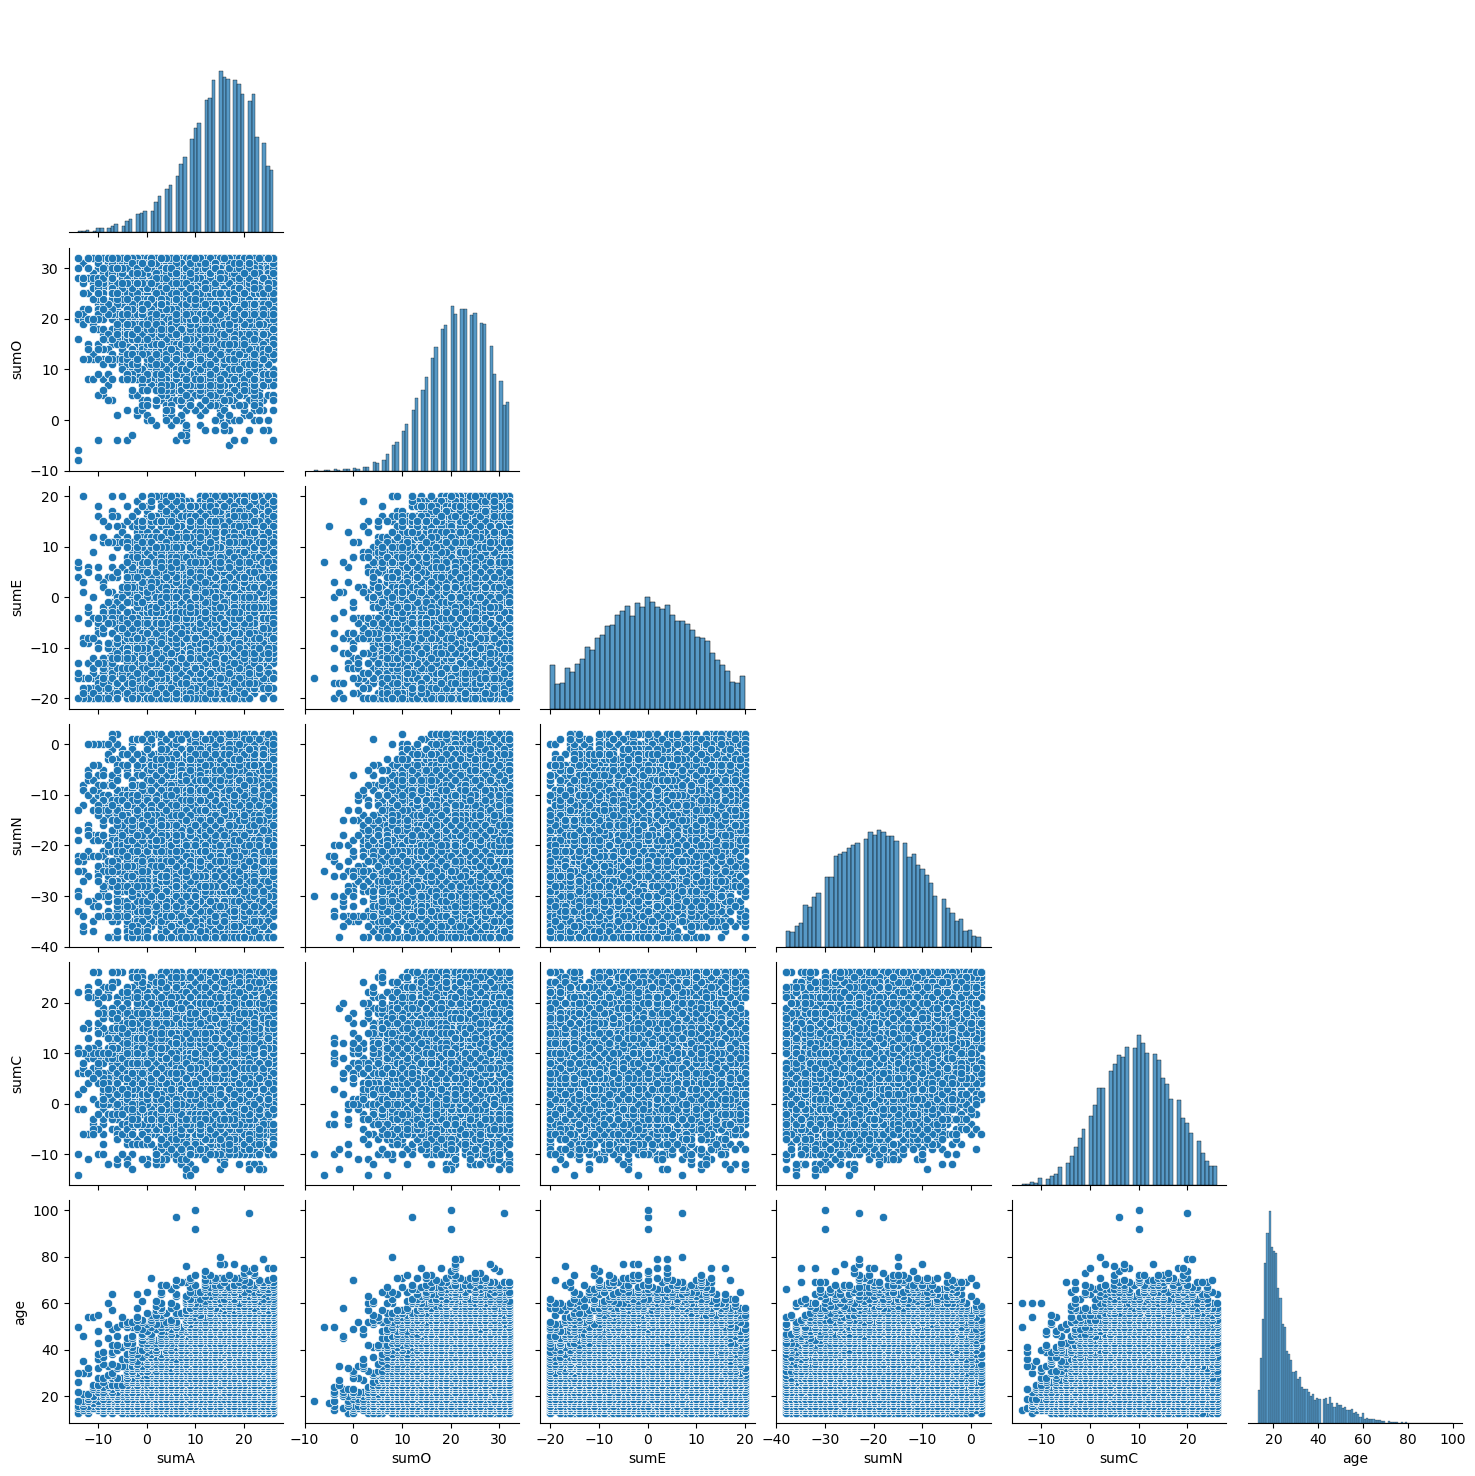

In [90]:
sns.pairplot(sortedAge, corner = True)

These graphs are showing some patterns between the ages and total scores, but I think it would be easier to view with less data to look at. I will group the ages and average the score amongst those ages

In [91]:
#Just to see how many different data points were in each column
sortedAge.nunique(axis=0)

sumA    41
sumO    40
sumE    41
sumN    41
sumC    41
age     71
dtype: int64

In [92]:
# What those data values are
print(sortedAge.apply(lambda col: col.unique()))

sumA    [8, 11, -1, 13, 16, 12, 9, 6, 17, 15, 20, 22, ...
sumO    [9, 12, 4, 14, -1, 18, 15, 27, 11, 29, 13, 8, ...
sumE    [6, 7, 9, -3, 13, 10, 11, 12, 16, 3, -11, -15,...
sumN    [-17, -30, -14, -25, -20, -8, -4, -16, -27, -2...
sumC    [8, 10, 5, 16, -4, -5, 13, 12, 11, 14, 24, 2, ...
age     [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...
dtype: object


In [93]:
# Sort the data by age group

def agegroup(df, upper, lower):
    df2 = df[df.age < upper]
    df2 = df2[df2.age >= lower]
    return df2

age1319 = agegroup(sortedAge, 20, 0)

age2029 = agegroup(sortedAge, 30, 20)

age3039 = agegroup(sortedAge, 40, 30)

age4049 = agegroup(sortedAge, 50, 40)

age5059 = agegroup(sortedAge, 60, 50)

age6069 = agegroup(sortedAge, 70, 60)

age7079 = agegroup(sortedAge, 80, 70)

age8089 = agegroup(sortedAge, 90, 80)

age90100 = agegroup(sortedAge, 101, 90)


In [94]:
# Average of each age groups total scores
teensA = sum(age1319['sumA'])/len(age1319)
teensO = sum(age1319['sumO'])/len(age1319)
teensE = sum(age1319['sumE'])/len(age1319)
teensN = sum(age1319['sumN'])/len(age1319)
teensC = sum(age1319['sumC'])/len(age1319)
twentysA = sum(age2029['sumA'])/len(age2029)
twentysO = sum(age2029['sumO'])/len(age2029)
twentysE = sum(age2029['sumE'])/len(age2029)
twentysN = sum(age2029['sumN'])/len(age2029)
twentysC = sum(age2029['sumC'])/len(age2029)
thirtysA = sum(age3039['sumA'])/len(age3039)
thirtysO = sum(age3039['sumO'])/len(age3039)
thirtysE = sum(age3039['sumE'])/len(age3039)
thirtysN = sum(age3039['sumN'])/len(age3039)
thirtysC = sum(age3039['sumC'])/len(age3039)
fortysA = sum(age4049['sumA'])/len(age4049)
fortysO = sum(age4049['sumO'])/len(age4049)
fortysE = sum(age4049['sumE'])/len(age4049)
fortysN = sum(age4049['sumN'])/len(age4049)
fortysC = sum(age4049['sumC'])/len(age4049)
fiftysA = sum(age5059['sumA'])/len(age5059)
fiftysO = sum(age5059['sumO'])/len(age5059)
fiftysE = sum(age5059['sumE'])/len(age5059)
fiftysN = sum(age5059['sumN'])/len(age5059)
fiftysC = sum(age5059['sumC'])/len(age5059)
sixtysA = sum(age6069['sumA'])/len(age6069)
sixtysO = sum(age6069['sumO'])/len(age6069)
sixtysE = sum(age6069['sumE'])/len(age6069)
sixtysN = sum(age6069['sumN'])/len(age6069)
sixtysC = sum(age6069['sumC'])/len(age6069)
seventysA = sum(age7079['sumA'])/len(age7079)
seventysO = sum(age7079['sumO'])/len(age7079)
seventysE = sum(age7079['sumE'])/len(age7079)
seventysN = sum(age7079['sumN'])/len(age7079)
seventysC = sum(age7079['sumC'])/len(age7079)
eightysA = sum(age8089['sumA'])/len(age8089)
eightysO = sum(age8089['sumO'])/len(age8089)
eightysE = sum(age8089['sumE'])/len(age8089)
eightysN = sum(age8089['sumN'])/len(age8089)
eightysC = sum(age8089['sumC'])/len(age8089)
ninetysA = sum(age90100['sumA'])/len(age90100)
ninetysO = sum(age90100['sumO'])/len(age90100)
ninetysE = sum(age90100['sumE'])/len(age90100)
ninetysN = sum(age90100['sumN'])/len(age90100)
ninetysC = sum(age90100['sumC'])/len(age90100)

In [95]:
# create data frame from these averages
teens = pd.DataFrame({'A':[teensA], 'O':[teensO], 'E':[teensE], 'N':[teensN], 'C':[teensC], 'age':'13-19'})

twentys = pd.DataFrame({'A':[twentysA], 'O':[twentysO], 'E':[twentysE], 'N':[twentysN], 'C':[twentysC], 'age':'20-29'})

thirtys = pd.DataFrame({'A':[thirtysA], 'O':[thirtysO], 'E':[thirtysE], 'N':[thirtysN], 'C':[thirtysC], 'age':'30-39'})

fortys = pd.DataFrame({'A':[fortysA], 'O':[fortysO], 'E':[fortysE], 'N':[fortysN], 'C':[fortysC], 'age':'40-49'})

fiftys = pd.DataFrame({'A':[fiftysA], 'O':[fiftysO], 'E':[fiftysE], 'N':[fiftysN], 'C':[fiftysC], 'age':'50-59'})

sixtys = pd.DataFrame({'A':[sixtysA], 'O':[sixtysO], 'E':[sixtysE], 'N':[sixtysN], 'C':[sixtysC], 'age':'60-69'})

seventys = pd.DataFrame({'A':[seventysA], 'O':[seventysO], 'E':[seventysE], 'N':[seventysN], 'C':[seventysC], 'age':'70-79'})

eightys = pd.DataFrame({'A':[eightysA], 'O':[eightysO], 'E':[eightysE], 'N':[eightysN], 'C':[eightysC], 'age':'80-89'})

ninetys = pd.DataFrame({'A':[ninetysA], 'O':[ninetysO], 'E':[ninetysE], 'N':[ninetysN], 'C':[ninetysC], 'age':'90-100'})


In [96]:
#combine these frames to create the dataframe with just the data I want to use
agevper=[teens, twentys, thirtys, fortys, fiftys, sixtys, seventys, eightys, ninetys]
agevperson = pd.concat(agevper, axis=0)
agevperson

,A,O,E,N,C,age
0,13.254140,20.548630,-0.962060,-20.301566,7.664709,13-19
0,14.444534,21.012789,0.204631,-19.081449,9.497577,20-29
0,15.367542,21.902944,0.665871,-18.115752,11.022275,30-39
0,16.114776,22.067942,1.747361,-16.866095,11.982850,40-49
0,16.997701,22.039080,2.581609,-15.300000,12.720690,50-59
0,17.432056,22.059233,1.637631,-15.275261,12.494774,60-69
0,16.860465,20.000000,-0.395349,-16.813953,12.651163,70-79
0,15.000000,8.000000,7.000000,-15.000000,2.000000,80-89
0,11.750000,20.750000,1.750000,-25.250000,11.500000,90-100


<AxesSubplot:xlabel='age', ylabel='C'>

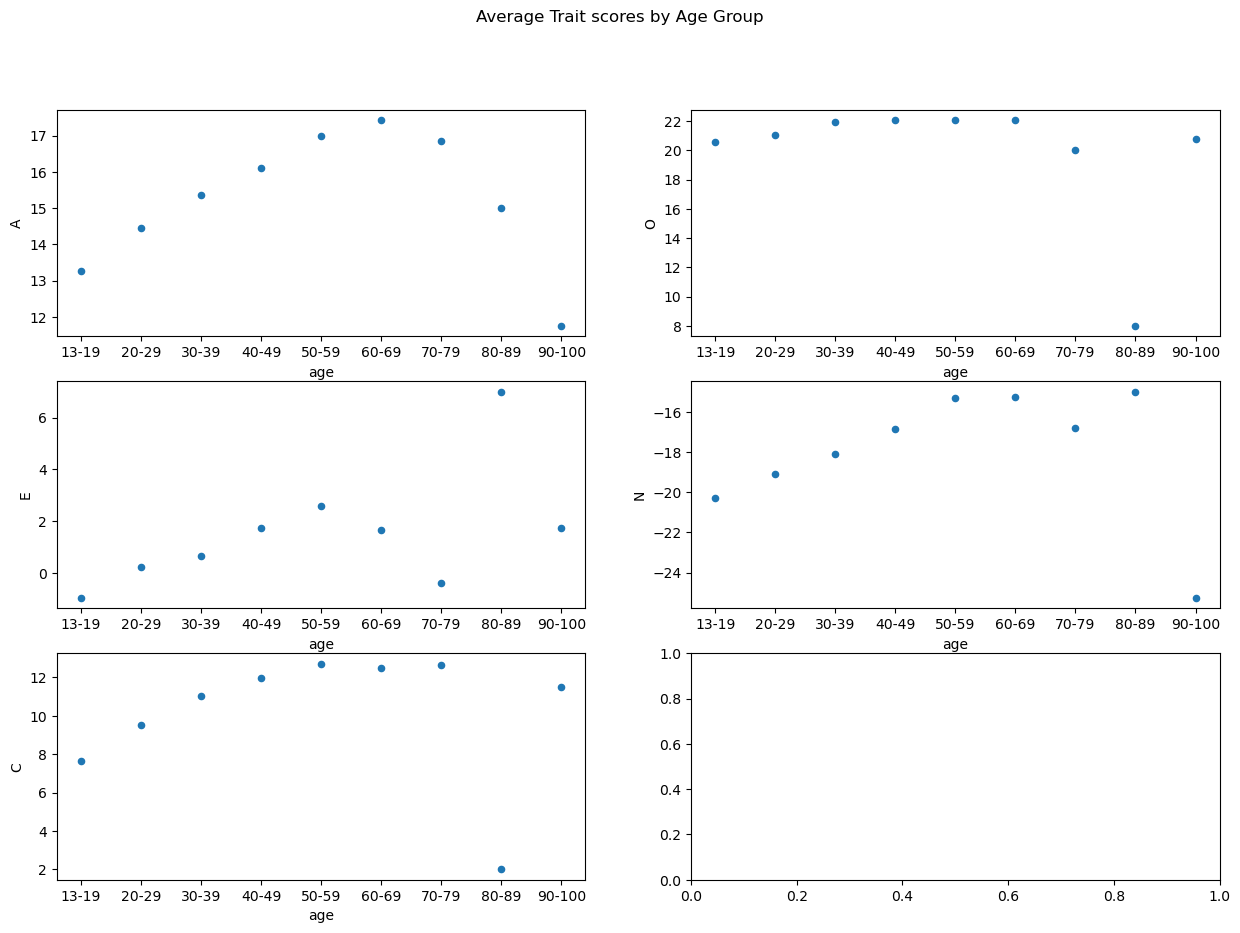

In [97]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Average Trait scores by Age Group')
agevperson.plot(ax=axes[0, 0], kind='scatter', x='age', y='A')
agevperson.plot(ax=axes[0, 1], kind='scatter', x='age', y='O')
agevperson.plot(ax=axes[1, 0], kind='scatter', x='age', y='E')
agevperson.plot(ax=axes[1, 1], kind='scatter', x='age', y='N')
agevperson.plot(ax=axes[2, 0], kind='scatter', x='age', y='C')
#agevperson.plot(kind='scatter', x='age', y='A')

Viewing these with lines might be easier

<AxesSubplot:xlabel='age'>

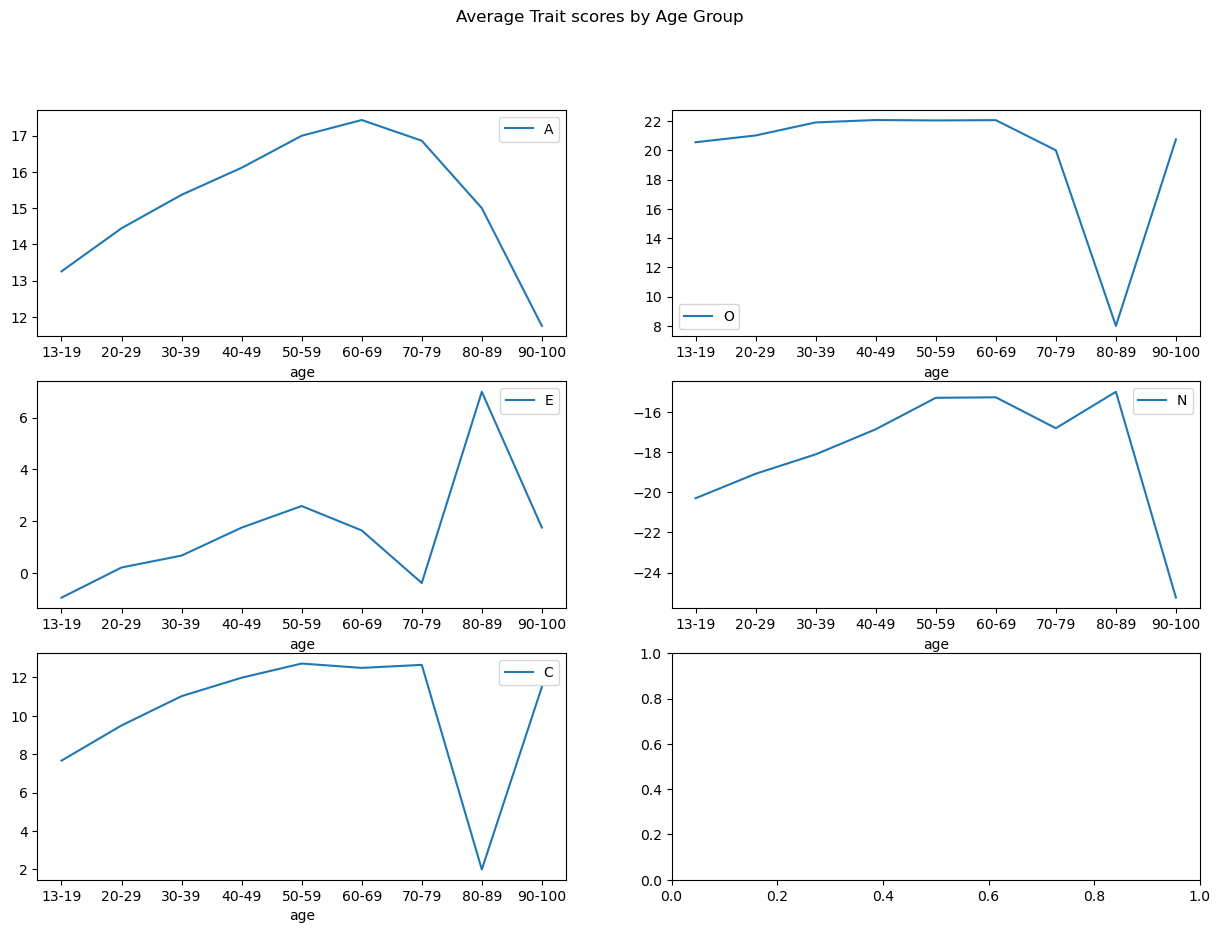

In [98]:
# Plot of age group vs their 'A' score
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Average Trait scores by Age Group')
agevperson.plot(ax=axes[0, 0], kind='line', x='age', y='A')
agevperson.plot(ax=axes[0, 1], kind='line', x='age', y='O')
agevperson.plot(ax=axes[1, 0], kind='line', x='age', y='E')
agevperson.plot(ax=axes[1, 1], kind='line', x='age', y='N')
agevperson.plot(ax=axes[2, 0], kind='line', x='age', y='C')

I need to keep in mind that this data only had one point for ages between 80-89

## Analysis Pipeline

### Load Data

In [99]:
# Import needed libraries
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# Read file
file = ('../data/raw/data.csv')
df = pd.read_csv(file, sep='\t')

### Clean Data

In [101]:
dfnoZero = df.loc[(df!=0).all(axis=1)]
usableData = dfnoZero[dfnoZero.age <= 100]
usableData.index=range(19305)
usableData

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19301,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19302,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19303,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


### Process Data

In [102]:
## From these I need to pull the values convert them to negative values if needed

# Scores that need to be negative: A1, A3, A5, A7, O2, O4, O6, E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, C2, C4, C6, C8

def negative(df, cols):
    df2 = -df[cols]
    df3 = df.drop(df[cols], axis=1)
    newFrame = [df3, df2]
    df4 = pd.concat(newFrame, axis=1)
    return df4

revers = negative(usableData, cols=['A1', 'A3', 'A5', 'A7', 'O2', 'O4', 'O6',  'E2', 'E4', 'E6', 'E8', 'E10', 'N1', 'N3', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'C2', 'C4', 'C6', 'C8'])
revers

## sum the scores

def sumcol(df, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10):
    return df[col1]+df[col2]+df[col3]+df[col4]+df[col5]+df[col6]+df[col7]+df[col8]+df[col9]+df[col10]

sumA = sumcol(revers, 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10')
sumO = sumcol(revers, 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10')
sumE = sumcol(revers, 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10')
sumN = sumcol(revers, 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10')
sumC = sumcol(revers, 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10')

### Wrangle Data

In [103]:
# Pull the age data from the non-zero dataframe
ageframe=(usableData['age'])
# Merge into one dataframe
agevpers=[sumA, sumO, sumE, sumN, sumC, ageframe]
agevpers = pd.concat(agevpers, axis=1)
agevpers = agevpers.rename(columns={0:'sumA', 1:'sumO', 2:'sumE', 3:'sumN', 4:'sumC'})
# Sort by Age
sortedAge = agevpers.sort_values(by=['age'])
sortedAge.index=range(19305)
sortedAge

,sumA,sumO,sumE,sumN,sumC,age
0,8,9,6,-17,8,13
1,11,12,7,-30,10,13
2,-1,4,9,-14,5,13
3,13,14,-3,-14,16,13
4,16,-1,13,-25,-4,13
...,...,...,...,...,...,...
19300,15,8,7,-15,2,80
19301,10,20,0,-30,10,92
19302,6,12,0,-18,6,97
19303,21,31,7,-23,20,99


### Process Data 2.0

In [104]:
# Sort the data by age group

def agegroup(df, upper, lower):
    df2 = df[df.age < upper]
    df2 = df2[df2.age >= lower]
    return df2

age1319 = agegroup(sortedAge, 20, 0)

age2029 = agegroup(sortedAge, 30, 20)

age3039 = agegroup(sortedAge, 40, 30)

age4049 = agegroup(sortedAge, 50, 40)

age5059 = agegroup(sortedAge, 60, 50)

age6069 = agegroup(sortedAge, 70, 60)

age7079 = agegroup(sortedAge, 80, 70)

age8089 = agegroup(sortedAge, 90, 80)

age90100 = agegroup(sortedAge, 101, 90)

# Average of each age groups total scores

teensA = sum(age1319['sumA'])/len(age1319)
teensO = sum(age1319['sumO'])/len(age1319)
teensE = sum(age1319['sumE'])/len(age1319)
teensN = sum(age1319['sumN'])/len(age1319)
teensC = sum(age1319['sumC'])/len(age1319)
twentysA = sum(age2029['sumA'])/len(age2029)
twentysO = sum(age2029['sumO'])/len(age2029)
twentysE = sum(age2029['sumE'])/len(age2029)
twentysN = sum(age2029['sumN'])/len(age2029)
twentysC = sum(age2029['sumC'])/len(age2029)
thirtysA = sum(age3039['sumA'])/len(age3039)
thirtysO = sum(age3039['sumO'])/len(age3039)
thirtysE = sum(age3039['sumE'])/len(age3039)
thirtysN = sum(age3039['sumN'])/len(age3039)
thirtysC = sum(age3039['sumC'])/len(age3039)
fortysA = sum(age4049['sumA'])/len(age4049)
fortysO = sum(age4049['sumO'])/len(age4049)
fortysE = sum(age4049['sumE'])/len(age4049)
fortysN = sum(age4049['sumN'])/len(age4049)
fortysC = sum(age4049['sumC'])/len(age4049)
fiftysA = sum(age5059['sumA'])/len(age5059)
fiftysO = sum(age5059['sumO'])/len(age5059)
fiftysE = sum(age5059['sumE'])/len(age5059)
fiftysN = sum(age5059['sumN'])/len(age5059)
fiftysC = sum(age5059['sumC'])/len(age5059)
sixtysA = sum(age6069['sumA'])/len(age6069)
sixtysO = sum(age6069['sumO'])/len(age6069)
sixtysE = sum(age6069['sumE'])/len(age6069)
sixtysN = sum(age6069['sumN'])/len(age6069)
sixtysC = sum(age6069['sumC'])/len(age6069)
seventysA = sum(age7079['sumA'])/len(age7079)
seventysO = sum(age7079['sumO'])/len(age7079)
seventysE = sum(age7079['sumE'])/len(age7079)
seventysN = sum(age7079['sumN'])/len(age7079)
seventysC = sum(age7079['sumC'])/len(age7079)
eightysA = sum(age8089['sumA'])/len(age8089)
eightysO = sum(age8089['sumO'])/len(age8089)
eightysE = sum(age8089['sumE'])/len(age8089)
eightysN = sum(age8089['sumN'])/len(age8089)
eightysC = sum(age8089['sumC'])/len(age8089)
ninetysA = sum(age90100['sumA'])/len(age90100)
ninetysO = sum(age90100['sumO'])/len(age90100)
ninetysE = sum(age90100['sumE'])/len(age90100)
ninetysN = sum(age90100['sumN'])/len(age90100)
ninetysC = sum(age90100['sumC'])/len(age90100)

### Wrangle Data 2.0

In [105]:
# create data frame from these averages
teens = pd.DataFrame({'A':[teensA], 'O':[teensO], 'E':[teensE], 'N':[teensN], 'C':[teensC], 'age':'13-19'})
twentys = pd.DataFrame({'A':[twentysA], 'O':[twentysO], 'E':[twentysE], 'N':[twentysN], 'C':[twentysC], 'age':'20-29'})
thirtys = pd.DataFrame({'A':[thirtysA], 'O':[thirtysO], 'E':[thirtysE], 'N':[thirtysN], 'C':[thirtysC], 'age':'30-39'})
fortys = pd.DataFrame({'A':[fortysA], 'O':[fortysO], 'E':[fortysE], 'N':[fortysN], 'C':[fortysC], 'age':'40-49'})
fiftys = pd.DataFrame({'A':[fiftysA], 'O':[fiftysO], 'E':[fiftysE], 'N':[fiftysN], 'C':[fiftysC], 'age':'50-59'})
sixtys = pd.DataFrame({'A':[sixtysA], 'O':[sixtysO], 'E':[sixtysE], 'N':[sixtysN], 'C':[sixtysC], 'age':'60-69'})
seventys = pd.DataFrame({'A':[seventysA], 'O':[seventysO], 'E':[seventysE], 'N':[seventysN], 'C':[seventysC], 'age':'70-79'})
eightys = pd.DataFrame({'A':[eightysA], 'O':[eightysO], 'E':[eightysE], 'N':[eightysN], 'C':[eightysC], 'age':'80-89'})
ninetys = pd.DataFrame({'A':[ninetysA], 'O':[ninetysO], 'E':[ninetysE], 'N':[ninetysN], 'C':[ninetysC], 'age':'90-100'})

#combine these frames to create the dataframe with just the data I want to use
agevper=[teens, twentys, thirtys, fortys, fiftys, sixtys, seventys, eightys, ninetys]
agevperson = pd.concat(agevper, axis=0)
agevperson

,A,O,E,N,C,age
0,13.254140,20.548630,-0.962060,-20.301566,7.664709,13-19
0,14.444534,21.012789,0.204631,-19.081449,9.497577,20-29
0,15.367542,21.902944,0.665871,-18.115752,11.022275,30-39
0,16.114776,22.067942,1.747361,-16.866095,11.982850,40-49
0,16.997701,22.039080,2.581609,-15.300000,12.720690,50-59
0,17.432056,22.059233,1.637631,-15.275261,12.494774,60-69
0,16.860465,20.000000,-0.395349,-16.813953,12.651163,70-79
0,15.000000,8.000000,7.000000,-15.000000,2.000000,80-89
0,11.750000,20.750000,1.750000,-25.250000,11.500000,90-100


## Method Chain

In [106]:
# Import needed libraries
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Method Chain 1


Read and clean data

In [107]:
df = pd.read_csv("../data/raw/data.csv", sep='\t')
usableData = (df.drop(['engnat','hand','source', 'country', 'race', 'gender'], axis=1)
              .copy()[(df['age'] <= 100) & (df!=0).all(axis=1)]
              .copy().reset_index(drop=True))
usableData

# Load csv file
# then drop unwanted columns, and remove a row with missing data, ages over 100
# and reindex the row numbers

,age,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,53,4,2,5,2,5,1,4,3,5,...,4,1,3,1,5,1,4,2,5,5
1,46,2,2,3,3,3,3,1,5,1,...,3,3,3,3,2,3,3,1,3,2
2,14,5,1,1,4,5,1,1,5,5,...,4,5,5,1,5,1,5,5,5,5
3,19,2,5,2,4,3,4,3,4,4,...,4,3,5,2,4,2,5,2,5,5
4,25,3,1,3,3,3,1,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300,15,1,4,3,5,4,3,1,2,1,...,1,3,5,3,4,1,4,2,5,3
19301,37,2,3,2,3,2,3,2,4,4,...,1,2,3,2,3,3,4,2,3,3
19302,16,2,5,4,5,5,5,1,2,1,...,5,3,1,3,4,1,1,5,5,5
19303,16,1,4,2,3,2,4,1,3,4,...,3,2,5,3,4,1,5,3,5,5


## Functions: Reverse Score, Sum Rows, Make Age Groups

Negate, sum the values, and group values

In [108]:
def negative(df, cols):
    df2 = -df[cols]
    df3 = df.drop(df[cols], axis=1)
    newFrame = [df3, df2]
    df4 = pd.concat(newFrame, axis=1)
    return df4

revers = negative(df, cols=['A1', 'A3', 'A5', 'A7', 'O2', 'O4', 'O6',  'E2', 'E4', 'E6', 'E8', 'E10', 'N1', 'N3', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'C2', 'C4', 'C6', 'C8'])

def sumcol(df, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10):
    return df[col1]+df[col2]+df[col3]+df[col4]+df[col5]+df[col6]+df[col7]+df[col8]+df[col9]+df[col10]

sumA = sumcol(revers, 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10')
sumO = sumcol(revers, 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10')
sumE = sumcol(revers, 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10')
sumN = sumcol(revers, 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10')
sumC = sumcol(revers, 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10')

def agegroup(df, upper, lower):
    df2 = df[df.age < upper]
    df2 = df2[df2.age >= lower]
    return df2

age1319 = agegroup(sortedAge, 20, 0)
age2029 = agegroup(sortedAge, 30, 20)
age3039 = agegroup(sortedAge, 40, 30)
age4049 = agegroup(sortedAge, 50, 40)
age5059 = agegroup(sortedAge, 60, 50)
age6069 = agegroup(sortedAge, 70, 60)
age7079 = agegroup(sortedAge, 80, 70)
age8089 = agegroup(sortedAge, 90, 80)
age90100 = agegroup(sortedAge, 101, 90)

## Defining which columns go with which trait
### E = Extroversion
### N = Neuroticism
### A = Agreeableness
### C = Conscientiousness
### O = Openness to Experience

<AxesSubplot:xlabel='age'>

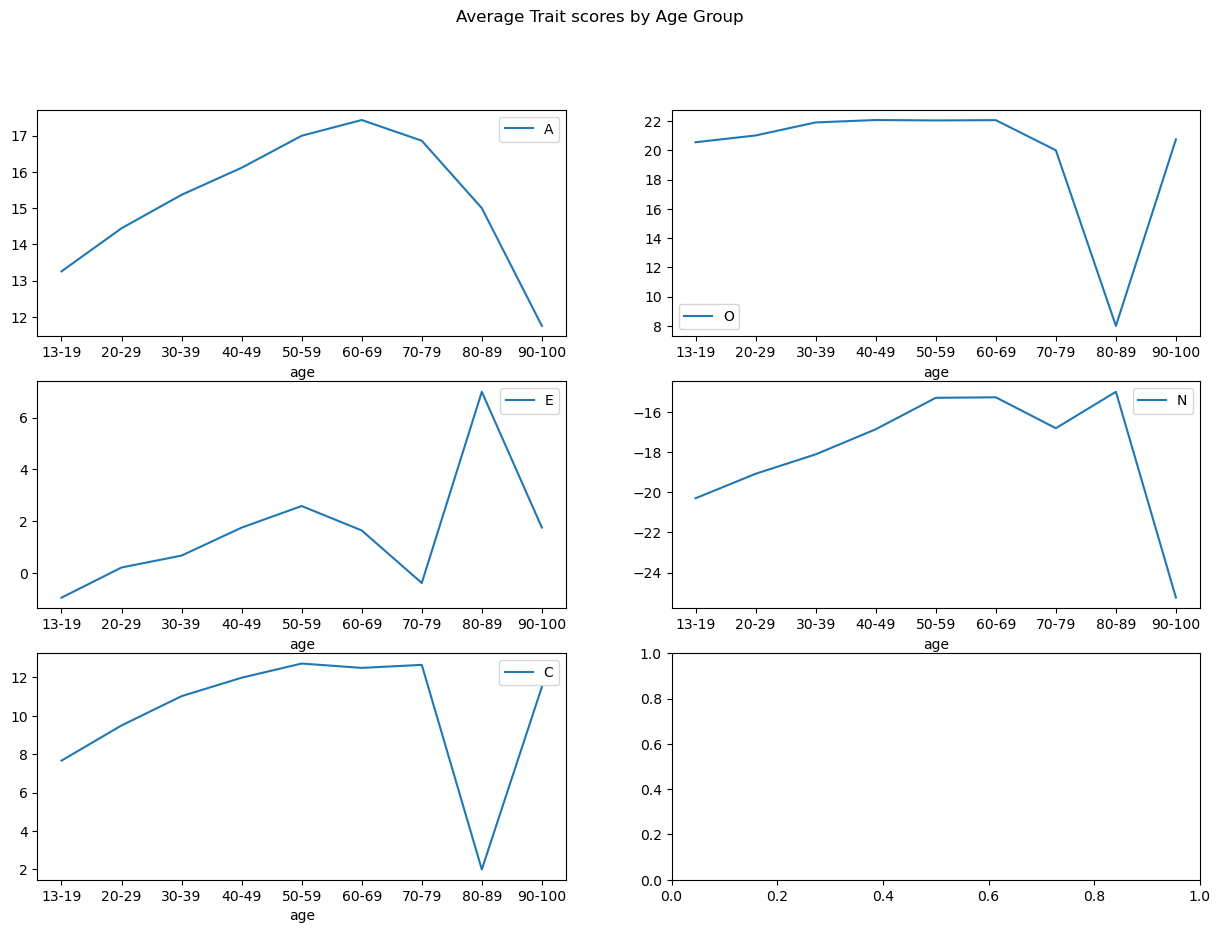

In [109]:
# Plot of age group vs their 'A' score
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Average Trait scores by Age Group')
agevperson.plot(ax=axes[0, 0], kind='line', x='age', y='A')
agevperson.plot(ax=axes[0, 1], kind='line', x='age', y='O')
agevperson.plot(ax=axes[1, 0], kind='line', x='age', y='E')
agevperson.plot(ax=axes[1, 1], kind='line', x='age', y='N')
agevperson.plot(ax=axes[2, 0], kind='line', x='age', y='C')

# Conclusions

From the graphs it is possible to see that there is not much correlation between the different personality traits and age groups.
This data could be better defined with a more even spread of information between the age groups, but from given data it can be seen that most traits tend to fluctuate very little between the age groups and the only drastic differences are where there was little data, skewing the results. The age group 80-89 only had one data point.
This shows that it doesn't matter so much what time period a person was raised in and what parenting techniques were popular at the time, these traits are more based on the individual person.


In [110]:
agevperson

,A,O,E,N,C,age
0,13.254140,20.548630,-0.962060,-20.301566,7.664709,13-19
0,14.444534,21.012789,0.204631,-19.081449,9.497577,20-29
0,15.367542,21.902944,0.665871,-18.115752,11.022275,30-39
0,16.114776,22.067942,1.747361,-16.866095,11.982850,40-49
0,16.997701,22.039080,2.581609,-15.300000,12.720690,50-59
0,17.432056,22.059233,1.637631,-15.275261,12.494774,60-69
0,16.860465,20.000000,-0.395349,-16.813953,12.651163,70-79
0,15.000000,8.000000,7.000000,-15.000000,2.000000,80-89
0,11.750000,20.750000,1.750000,-25.250000,11.500000,90-100


In [111]:
agevperson.to_csv('../data/processed/Mel_Jensen_processed.csv')

In [112]:
sortedAge.to_csv('../data/processed/Mel_Jensen_processed2.csv')